<a href="https://colab.research.google.com/github/GeovaniOrt/Redes-Neuronales/blob/main/Red_Multicapa/MLP_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Multicapa

## ¿Qué es?

Una red neuronal multicapa (`MLP`) es un tipo de red neuronal artificial con al menos tres capas: una capa de entrada, una o más capas ocultas y una capa de salida. Se utiliza en aprendizaje automático para resolver problemas complejos de clasificación y regresión, ya que puede modelar relaciones no lineales. Su funcionamiento se basa en la propagación de información a través de las capas y el ajuste de los pesos entre neuronas para minimizar el error, un proceso que a menudo se logra mediante el algoritmo de propagación hacia atrás (backpropagation).

## Capacidades y limitaciones

`Capacidades`:

      * Resuelve problemas que no son linealmente separables, a diferencia del perceptrón simple.
      * Realiza tareas de clasificación y regresión.
      * Puede ser usada en aplicaciones como detección de fraudes, análisis de sentimientos e identificación de objetos.

`Limitaciones`:

    * El entrenamiento puede ser computacionalmente costoso y requiere grandes conjuntos de datos para evitar el sobreajuste.
    * La elección de la arquitectura (número de capas y neuronas) es un desafío.
    * Puede tener múltiples mínimos locales, lo que significa que diferentes inicializaciones de pesos pueden llevar a resultados diferentes.



## Ejemplo aplicado:

El siguiente código esta daptado para la tarea de Regresión (predicción del Saldo de la Cuenta) en base a un archivo CSV, llamado "Comprehensive Banking Database" obtenido de Kaggle.

El código incluye la carga de datos, el preprocesamiento, la definición del modelo, el entrenamiento y la evaluación.

Link al CSV: https://www.kaggle.com/datasets/alanjo/comprehensive-banking-database?resource=download

Para tener la información completa del dataset puede consultarse en el siguiente link: https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas

#### Carga de datos:

""" Importamos las librerias a usar """

In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

""" Cargamos nuestro archivo CSV """

In [2]:
"""
Estamos cargando nuestro CSV desde GitHub
"""
url = "https://raw.githubusercontent.com/GeovaniOrt/Redes-Neuronales/main/Comprehensive_Banking_Database.csv"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text), sep=',', engine='python') #Es la extensión/conexción de GitHub con Python para leer el CSV

""" Visualizamos la correcta carga de nuestro DataFrame """

In [3]:
print("Visualización inicial del DataFrame:")
print(df.head())
print("-" * 50)

Visualización inicial del DataFrame:
   Customer ID First Name Last Name  Age  Gender    Address           City  \
0            1     Joshua      Hall   45    Male  Address_1     Fort Worth   
1            2       Mark    Taylor   47  Female  Address_2     Louisville   
2            3     Joseph    Flores   25  Female  Address_3   Philadelphia   
3            4      Kevin       Lee   52   Other  Address_4  Oklahoma City   
4            5      Linda   Johnson   68   Other  Address_5        Phoenix   

   Contact Number                  Email Account Type  ...  \
0     19458794854    joshua.hall@kag.com      Current  ...   
1     19458794855    mark.taylor@kag.com      Current  ...   
2     19458794856  joseph.flores@kag.com      Current  ...   
3     19458794857      kevin.lee@kag.com      Savings  ...   
4     19458794858  linda.johnson@kag.com      Savings  ...   

   Minimum Payment Due Payment Due Date Last Credit Card Payment Date  \
0               226.22       11/26/2023         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   float64
 11  Date Of Account Opening            5000 non-null   objec

#### Procesamiento de datos:

""" Definimos las características (X) y variable objetivo (y) """

In [5]:
# Seleccionamos algunas columnas numéricas relevantes para X
feature_cols = [
    'Age',
    'Loan Amount',
    'Interest Rate',
    'Loan Term',
    'Credit Limit',
    'Credit Card Balance',
    'Minimum Payment Due',
    'Rewards Points'
]
target_col = 'Account Balance'

In [6]:
# Crear una copia para el modelado y manejar NaNs
df_model = df[feature_cols + [target_col]].copy()
df_model = df_model.select_dtypes(include=np.number) # Asegurar solo columnas numéricas

""" Rellenamos los valores nulos con los valores de la media """

In [7]:
df_model = df_model.fillna(df_model.mean())

X = df_model[feature_cols].values
y = df_model[target_col].values

In [8]:
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Forma de los datos después del preprocesamiento y división:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"y_train: {y_train.shape}")
print("-" * 50)

Forma de los datos después del preprocesamiento y división:
X_train_scaled: (4000, 8)
y_train: (4000,)
--------------------------------------------------


#### Entrenamiento de la red Neuronal

""" Definimos el modelo (Haremos una regresión)"""

In [10]:
model = Sequential([
    # Capa de entrada
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    # Capa oculta
    Dense(64, activation='relu'),
    # Capa de salida (1 neurona con activación lineal para regresión)
    Dense(1, activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compilación
model.compile(optimizer='adam',
              loss='mse', # Mean Squared Error (típico para regresión)
              metrics=['mae']) # Mean Absolute Error

""" Resumen del modelo """

In [12]:
print("Resumen de la Arquitectura de la MLP:")
model.summary()
print("-" * 50)

Resumen de la Arquitectura de la MLP:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------


#### Entrenamiento

In [13]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 34072768.0000 - mae: 5091.4971 - val_loss: 33835836.0000 - val_mae: 5090.0200
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31468612.0000 - mae: 4835.2295 - val_loss: 30674438.0000 - val_mae: 4773.4678
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28733416.0000 - mae: 4551.0127 - val_loss: 23283320.0000 - val_mae: 4035.5796
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20882184.0000 - mae: 3761.3186 - val_loss: 14639552.0000 - val_mae: 3147.6326
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13032411.0000 - mae: 2986.2839 - val_loss: 9771738.0000 - val_mae: 2625.7632
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9545521.0000 - mae: 2637.0278 - val_loss: 8756999.0000 - val_mae: 2503.0381
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8649339.0000 - mae: 2527.5886 - val_loss: 8574799.0000 - val_mae: 2482.3335
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━

#### Evaluación del modelo

In [14]:
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Pérdida (MSE) en el conjunto de prueba: {loss:.2f}")
print(f"MAE (Error Absoluto Medio) en el conjunto de prueba: {mae:.2f}")

Pérdida (MSE) en el conjunto de prueba: 8306161.00
MAE (Error Absoluto Medio) en el conjunto de prueba: 2476.59


#### Predicción

In [15]:
# Seleccionar un índice de ejemplo (por ejemplo, el primer registro de prueba)
ejemplo_idx = 0
ejemplo_X_scaled = X_test_scaled[ejemplo_idx].reshape(1, -1)
saldo_real = y_test[ejemplo_idx]
caracteristicas_ejemplo = X_test[ejemplo_idx] # Datos no escalados para visualización

In [16]:
# Predicción
prediccion = model.predict(ejemplo_X_scaled, verbose=0)[0][0]

print("--- Datos del Ejemplo para Predicción ---")
print(f"Características (Edad, Préstamo, Interés...): {caracteristicas_ejemplo}")
print(f"Saldo de la Cuenta real: {saldo_real:.2f}")
print(f"Predicción (por la MLP): {prediccion:.2f}")


--- Datos del Ejemplo para Predicción ---
Características (Edad, Préstamo, Interés...): [5.000000e+01 2.914952e+04 1.770000e+00 1.200000e+01 2.028390e+03
 1.844800e+02 9.220000e+00 1.670000e+03]
Saldo de la Cuenta real: 9011.73
Predicción (por la MLP): 6110.53


#### Función de perdida

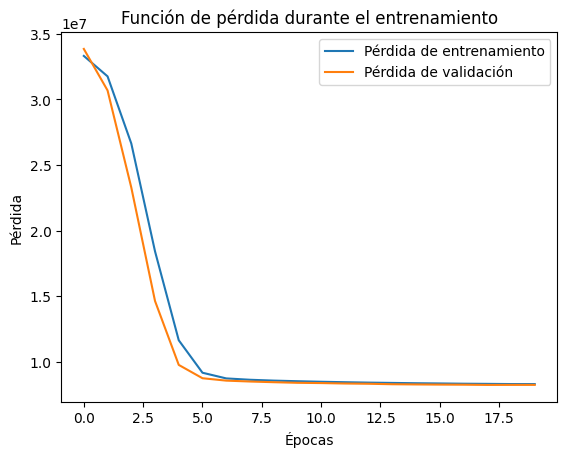

In [17]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

#### Otras metricas

In [18]:
print("\nCurva de Aprendizaje (Pérdida en Entrenamiento y Validación):")
# Imprimir las pérdidas de las últimas épocas
for i in range(len(history.history['loss'])):
    print(f"Época {i+1}: Loss = {history.history['loss'][i]:.2f}, Val_Loss = {history.history['val_loss'][i]:.2f}")


Curva de Aprendizaje (Pérdida en Entrenamiento y Validación):
Época 1: Loss = 33302484.00, Val_Loss = 33835836.00
Época 2: Loss = 31746014.00, Val_Loss = 30674438.00
Época 3: Loss = 26633982.00, Val_Loss = 23283320.00
Época 4: Loss = 18420912.00, Val_Loss = 14639552.00
Época 5: Loss = 11648931.00, Val_Loss = 9771738.00
Época 6: Loss = 9175786.00, Val_Loss = 8756999.00
Época 7: Loss = 8743439.00, Val_Loss = 8574799.00
Época 8: Loss = 8640289.00, Val_Loss = 8506958.00
Época 9: Loss = 8576137.00, Val_Loss = 8454910.00
Época 10: Loss = 8530065.00, Val_Loss = 8408865.00
Época 11: Loss = 8488511.00, Val_Loss = 8388674.00
Época 12: Loss = 8453747.00, Val_Loss = 8355049.00
Época 13: Loss = 8423534.00, Val_Loss = 8335816.50
Época 14: Loss = 8399568.00, Val_Loss = 8300134.50
Época 15: Loss = 8376542.00, Val_Loss = 8284072.50
Época 16: Loss = 8359238.50, Val_Loss = 8272312.50
Época 17: Loss = 8339542.50, Val_Loss = 8264888.50
Época 18: Loss = 8327848.50, Val_Loss = 8247509.00
Época 19: Loss = 83

In [19]:
loss, mae = model.evaluate(X_test, y_test)
print(f"MAE en el conjunto test: {mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 935832236064768.0000 - mae: 27847906.0000
MAE en el conjunto test: 27384016.0


Teóricamente el modelo funciona (la pérdida (Loss) está disminuyendo tanto en el conjunto de entrenamiento (Loss) como en el conjunto de validación), por lo tanto, podemos hacer un ejercicio para evaluar su funcionalidad:

 --- Definir los datos de un NUEVO CLIENTE ---

In [20]:
# Los valores deben coincidir con las características usadas en el entrenamiento:
datos_nuevo_cliente = {
    'Age': 40,
    'Loan Amount': 45000.00,
    'Interest Rate': 5.5,
    'Loan Term': 48,
    'Credit Limit': 15000.00,
    'Credit Card Balance': 3200.00,
    'Minimum Payment Due': 150.00,
    'Rewards Points': 12000
}

--- Convertir los datos de entrada a la estructura de array (X) ---

In [21]:
# El orden de las columnas DEBE ser el mismo que el usado para entrenar.
X_nuevo = np.array([list(datos_nuevo_cliente.values())])

print("Datos de entrada (sin escalar):")
print(X_nuevo)
print("-" * 50)

Datos de entrada (sin escalar):
[[4.0e+01 4.5e+04 5.5e+00 4.8e+01 1.5e+04 3.2e+03 1.5e+02 1.2e+04]]
--------------------------------------------------


--- Escalar los datos usando el MISMO 'scaler' entrenado ---

In [22]:
#Si no se escala, la predicción será incorrecta.
X_nuevo_escalado = scaler.transform(X_nuevo)

print("Datos de entrada (escalados):")
# Mostramos solo los primeros 4 valores escalados para simplificar
print(X_nuevo_escalado[0][:4], "...")
print("-" * 50)

Datos de entrada (escalados):
[-2.35754103e-01  1.39909093e+00 -1.20628790e-03  6.83555428e-01] ...
--------------------------------------------------


--- Realizar la predicción ---

In [23]:
# Usamos el objeto 'model' que está en la memoria del Colab
prediccion_saldo = model.predict(X_nuevo_escalado, verbose=0)

# El resultado de Keras es un array 2D [[valor]], accedemos al valor
saldo_estimado = prediccion_saldo[0][0]

print("--- Resultado de la Predicción ---")
print(f"El Saldo de la Cuenta estimado para el cliente de {datos_nuevo_cliente['Age']} años es: **${saldo_estimado:,.2f}**")

--- Resultado de la Predicción ---
El Saldo de la Cuenta estimado para el cliente de 40 años es: **$7,072.10**
